In [2]:
import matplotlib.pyplot as plt
import numpy as np

tl_cold=np.array([1634.9005,1849.5853,2077.6246,2913.1393,3928.5982,2204.2720,2610.3202])
tl_hot=np.array([1077.8330,1232.0007,1389.7527,1856.9345,2429.2446,1557.9399,1895.1557])
TO=np.array([1016.6495,1016.4056,1023.9969,1384.6101,1688.2837,1008.8539,1105.8149])
MO=np.array([401.6,205.3,48.6,471.3,225.8,616.5,961.2])
mo1=np.array([23.5,19.2,20.1,31.2,22.7,18.1,20.9])
CO=np.array([207.8,158.0,206.5,174.5,166.1,167.7,150.6])
print(np.mean(MO[:5]),np.mean(MO[5:]))
print(MO[:5],MO[5:])
print(np.mean(CO[:5]),np.mean(CO[5:]))
print(CO[:5],CO[5:])
co1=np.array([5.44,5.65,7.21,4.23,6.89,5.55,4.23])
wf_hot=np.array([2325.8200,3225.5107])
labelsmodel = ['RN18', 'RN34', 'RN50', 'RN101', 'RN152','SRN101','SRN152']
labelsworker=['RN101-1','RN101-2','RN152-1','RN152-2','RN152-3','SRN101','SRN152']
labelsworkflow=['Before','After']

270.52000000000004 788.85
[401.6 205.3  48.6 471.3 225.8] [616.5 961.2]
182.57999999999998 159.14999999999998
[207.8 158.  206.5 174.5 166.1] [167.7 150.6]


0.5665337944779881


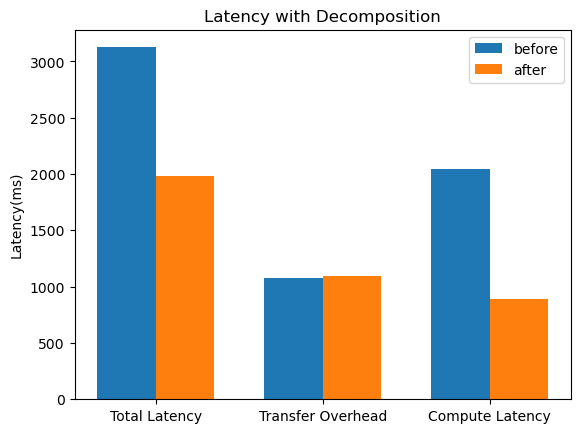

In [4]:
labels=["Total Latency","Transfer Overhead","Compute Latency"]
d_before=[3125.24,1078.16]
d_after=[1978.22,1090.88]
d_before.append(d_before[0]-d_before[1])
d_after.append(d_after[0]-d_after[1])
print((d_before[2]-d_after[2])/d_before[2])
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, d_before, width, label='before')
rects2 = ax.bar(x + width/2, d_after, width, label='after')
ax.set_ylabel('Latency(ms)')
ax.set_title('Latency with Decomposition')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.savefig("./tl_de.png",dpi=400)
plt.show()

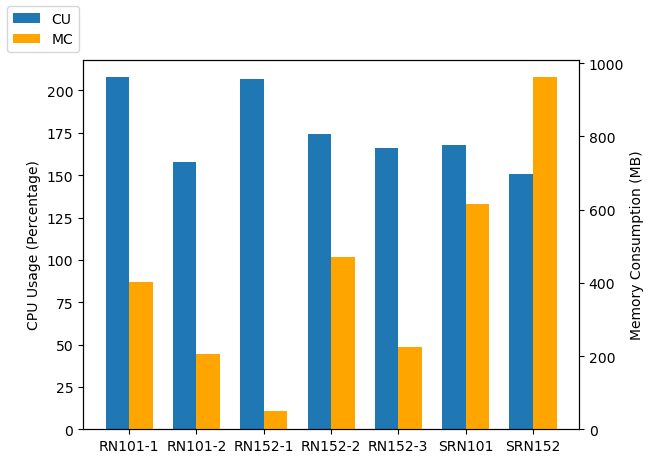

In [25]:
x = np.arange(len(labelsworker))
width = 0.35
fig, ax1 = plt.subplots()
ax1.bar(x - width/2, CO, width)
ax1.set_ylabel("CPU Usage (Percentage)")
ax2 = ax1.twinx()
ax2.bar(x + width/2, MO, width,color='orange')
ax2.set_ylabel('Memory Consumption (MB)')
ax1.set_xticks(x)
ax1.set_xticklabels(labelsworker)
fig.legend(labels = ('CU','MC'),loc='upper left')
plt.savefig("./consumption.png",dpi=400)
plt.show()

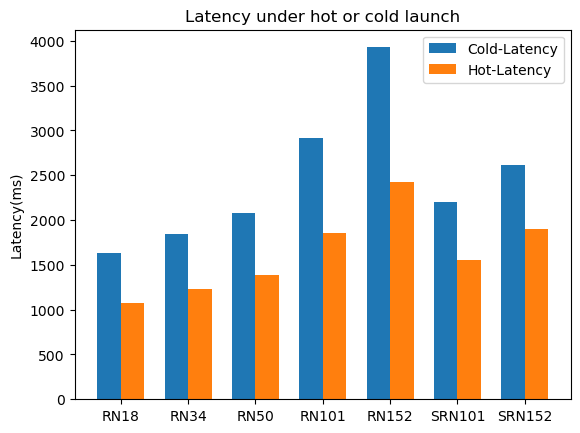

In [17]:

x = np.arange(len(labelsmodel))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tl_cold, width, label='Cold-Latency')
rects2 = ax.bar(x + width/2, tl_hot, width, label='Hot-Latency')
ax.set_ylabel('Latency(ms)')
ax.set_title('Latency under hot or cold launch')
ax.set_xticks(x)
ax.set_xticklabels(labelsmodel)
plt.legend()
plt.savefig("./tl_hotcold.png",dpi=400)
plt.show()

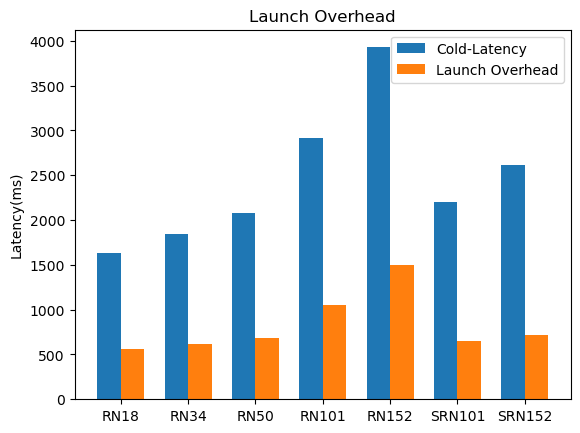

In [18]:
x = np.arange(len(labelsmodel))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tl_cold, width, label='Cold-Latency')
rects2 = ax.bar(x + width/2, tl_cold-tl_hot, width, label='Launch Overhead')
ax.set_ylabel('Latency(ms)')
ax.set_title('Launch Overhead')
ax.set_xticks(x)
ax.set_xticklabels(labelsmodel)
plt.legend()
plt.savefig("./tl_coldSLO.png",dpi=400)
plt.show()

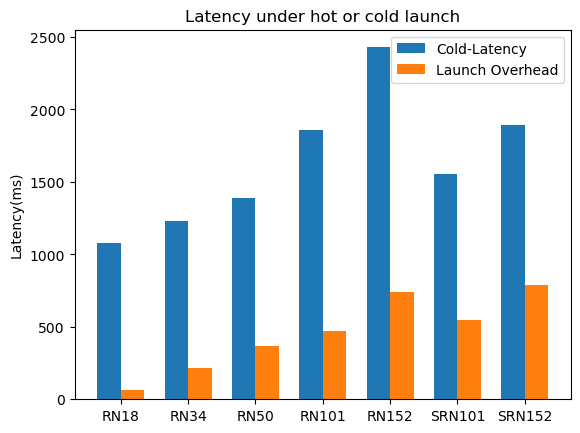

In [19]:
x = np.arange(len(labelsmodel))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tl_hot, width, label='Cold-Latency')
rects2 = ax.bar(x + width/2, tl_hot-TO, width, label='Launch Overhead')
ax.set_ylabel('Latency(ms)')
ax.set_title('Latency under hot or cold launch')
ax.set_xticks(x)
ax.set_xticklabels(labelsmodel)
plt.legend()
plt.savefig("./tl_coldTO.png",dpi=400)
plt.show()

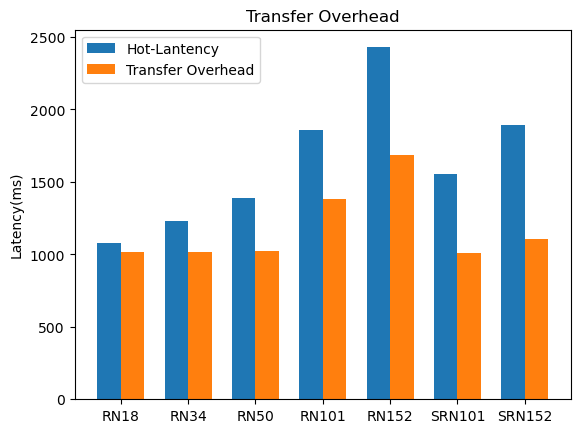

In [20]:
x = np.arange(len(labelsmodel))
width = 0.35  # the width of the bars
tl_hoot=np.array(tl_hot)
to=np.array(TO)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tl_hoot, width, label='Hot-Lantency')
rects2 = ax.bar(x + width/2, TO, width, label='Transfer Overhead')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency(ms)')
ax.set_title('Transfer Overhead')
ax.set_xticks(x)
ax.set_xticklabels(labelsmodel)
plt.legend()
plt.savefig("./tl_hotTO.png",dpi=400)
plt.show()